# Data Analytics Assignment 1
## Data overview

The dataset SAheart.data is taken from the link below: 
[http://www-stat.stanford.edu/~tibs/ElemStatLearn/datasets/SAheart.data](http://www-stat.stanford.edu/~tibs/ElemStatLearn/datasets/SAheart.data)

<p>The dataset contains retrospective sample of males in a heart-disease high-risk region of the Western Cape, South Africa. There are roughly two controls per case of Coronary Heart Disease (CHD). Many of the CHD-positive men have undergone blood pressure reduction treatment and other programs to reduce their risk factors after their CHD event. In some cases, the measurements were made after these treatments. These data are taken from a larger dataset, described in Rousseauw et al. (1983), South African Medical Journal. It is a tab separated file (csv) and contains the following columns </p>

[http://www-stat.stanford.edu](http://www-stat.stanford.edu)

<ul>
<li>sbp – Systolic blood pressure</li>
<li>tobacco – Cumulative tobacco (kg)</li>
<li>ldl – Low densiity lipoprotein cholesterol</li>
<li>adiposity</li>
<li>famhist – Family history of heart disease (Present, Absent)</li>
<li>typea – Type-A behavior</li>
<li>obesity</li>
<li>alcohol – Current alcohol consumption</li>
<li>age – Age at onset</li>
<li>chd – Response, coronary heart disease</li>
</ul>




## Packages

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
heartdf = pd.read_csv('SAheart.data')
heartdf = heartdf.drop('row.names', axis = 1)

## Q.1 How many records are present in the dataset? Print the metadata information of the dataset.

In [73]:
heartdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    object 
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 36.2+ KB


## Q.2 Draw a bar plot to show the number of persons having CHD or not in comparison to they having family history of the disease or not

## Q.3 Does age have any correlation with sbp? Choose appropriate plot to show the relationship.

In [74]:
features = ['sbp', 'age']
heartdf[features].corr()

,sbp,age
sbp,1.000000,0.388771
age,0.388771,1.000000


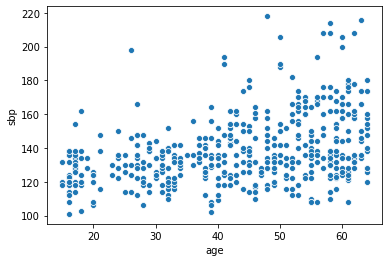

In [75]:
sns.scatterplot(x = 'age', y = 'sbp', data = heartdf);

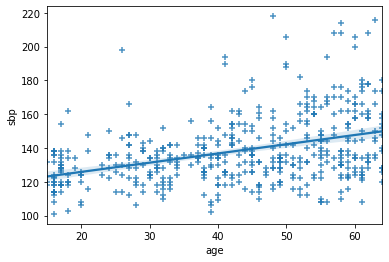

In [76]:
sns.regplot(x = 'age', y = 'sbp', data = heartdf, marker = '+');

## Q.4 Compare the distribution of tobacco consumption for persons having CHD and not having CHD. Can you interpret the effect of tobacco consumption on having coronary heart disease

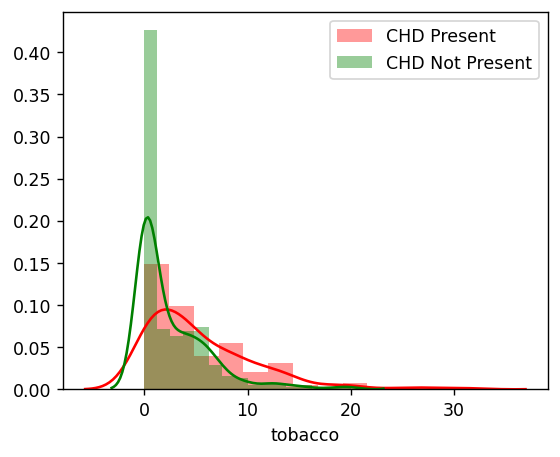

In [77]:
plt.figure(figsize = (5, 4), dpi = 125)
sns.distplot(a = heartdf[heartdf['chd'] == 1]['tobacco'], color = 'red', label = 'CHD Present');
sns.distplot(a = heartdf[heartdf['chd'] == 0]['tobacco'], color = 'green', label = 'CHD Not Present');
plt.legend();

## Q.5 How are the parameters sbp, obesity, age and ldl correlated? Choose the right plot to show the relationships


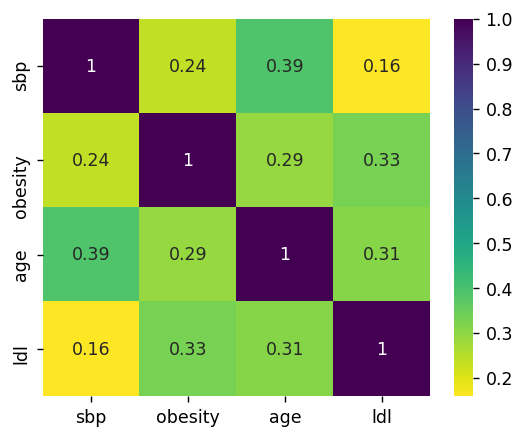

In [78]:
features = ['sbp', 'obesity', 'age', 'ldl']
plt.figure(figsize = (5, 4), dpi = 125)
sns.heatmap(heartdf[features].corr(), annot = True, cmap = 'viridis_r');

## Q.6 Derive a new column called age group from age column where persons falling in different age rangesare categorized as below
1. (0–15): young
2. (15–35): adults
3. (35–55): mid
4. (55–): old

In [79]:
def checkGroup(age):
    if age >= 0 and age <= 15:
        return 'Young'
    elif age > 15 and age <= 35:
        return 'Adults'
    elif age > 35 and age <= 55:
        return 'Mid'
    else:
        return 'Old'

In [80]:
heartdf['age group'] = heartdf['age'].apply(checkGroup)
heartdf.head(5)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd,age group
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1,Mid
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1,Old
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0,Mid
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1,Old
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1,Mid


In [81]:
heartdf['age group'].value_counts()

Mid       204
Adults    141
Old       114
Young       3
Name: age group, dtype: int64

## Q.7 Find out the number of CHD cases in different age categories. Do a barplot and sort them in the order of age groups.

In [82]:
categories = ['Young', 'Adults', 'Mid', 'Old']
categories_cnt = []
index = 0

for cat in categories:
    categories_cnt.append(heartdf[(heartdf['age group'] == categories[index]) & (heartdf['chd'] == 1)].shape[0])
    index = index + 1

In [83]:
categories_cnt

[0, 18, 81, 61]

Text(0, 0.5, 'Count')

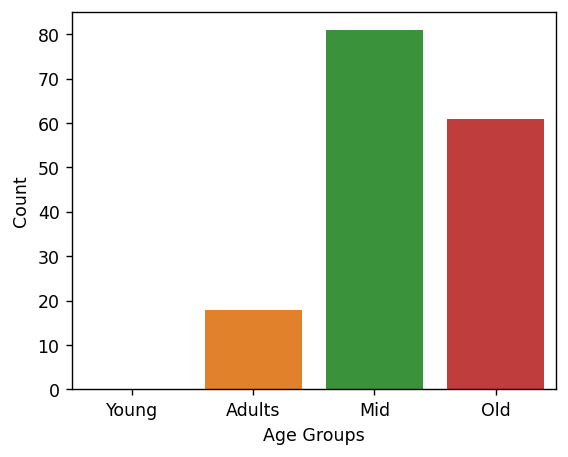

In [84]:
plt.figure(figsize = (5, 4), dpi = 125)
sns.barplot(x = categories, y = categories_cnt);

plt.xlabel("Age Groups");
plt.ylabel("Count")


## Q.8 Draw a box plot to compare distributions of ldl for different age groups.

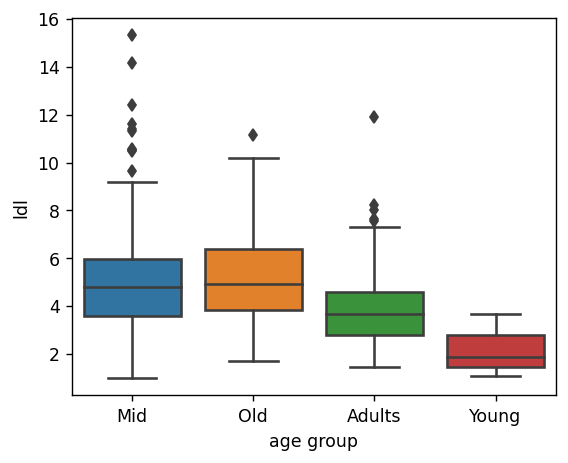

In [85]:
plt.figure(figsize = (5, 4), dpi = 125)
sns.boxplot(x = 'age group', y = 'ldl', data = heartdf);